## import the necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

read the data as **csv**

In [2]:
data = pd.read_csv('data1.csv', header=None, names =['Population', 'Profit'])
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


Now we have to plot the data with scatter chart

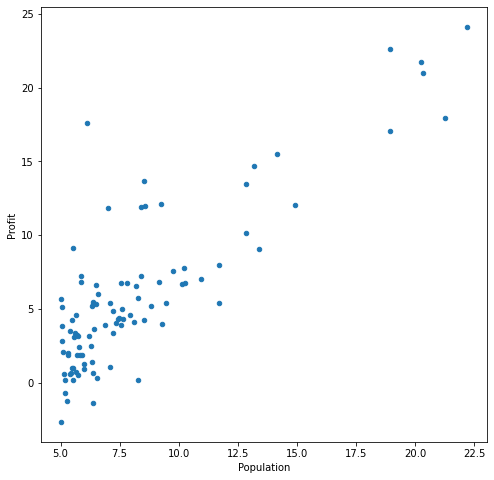

In [3]:
data.plot(kind='scatter', x='Population', y='Profit', figsize=(8,8))
plt.show()

adding a new column called ones before the data

In [4]:
data.insert(0,'ones',1)

In [5]:
data.head()

,ones,Population,Profit
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


separate X (training data) from y (target variable)

In [6]:
col = data.shape[1]
X = data.iloc[:,0:col-1]
Y = data.iloc[:,col-1:col]
X.head()

,ones,Population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [7]:
Y.head()

,Profit
0,17.5920
1,9.1302
2,13.6620
3,11.8540
4,6.8233


convert from data frames to numpy matrices

In [8]:
X = np.matrix(X)
Y = np.matrix(Y)
theta = np.matrix(np.array([0,0]))
theta

matrix([[0, 0]])

create the cost function using the following equation : 

$$\frac{1}{2m} \sum \limits _{i=1} ^{m} = (h_\theta - y)^{2}$$ 

In [9]:
def computeCost(x,y,theta):
    z = np.power(((x * theta.T)-y),2)
    return np.sum(z) / (2*len(x))

In [10]:
print(computeCost(X,Y,theta))

32.072733877455676


create the gradient descent function using the following equation : 

$$\theta_{j} = \theta_{j} - \alpha \frac{\partial }{\partial \theta_{j}}   j(\theta_{0}, \theta_{1})$$

In [11]:
def gradientDescent(X, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)
    
    for i in range(iters):
        error = (X * theta.T) - y
        
        for j in range(parameters):
            term = np.multiply(error, X[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))
            
        theta = temp
        cost[i] = computeCost(X, y, theta)
        
    return theta, cost

initialize variables for learning rate and iterations

In [19]:
alpha = 0.01
iters = 1000
g, cost = gradientDescent(X, Y, theta, alpha, iters)
print(g)
cost[:50]
computeCost(X,Y,g)

[[-3.24140214  1.1272942 ]]


4.515955503078914

In [20]:
l = np.linspace(data['Population'].min(), data['Population'].max(), 100)
print(l)

[ 5.0269      5.20039596  5.37389192  5.54738788  5.72088384  5.8943798
  6.06787576  6.24137172  6.41486768  6.58836364  6.7618596   6.93535556
  7.10885152  7.28234747  7.45584343  7.62933939  7.80283535  7.97633131
  8.14982727  8.32332323  8.49681919  8.67031515  8.84381111  9.01730707
  9.19080303  9.36429899  9.53779495  9.71129091  9.88478687 10.05828283
 10.23177879 10.40527475 10.57877071 10.75226667 10.92576263 11.09925859
 11.27275455 11.44625051 11.61974646 11.79324242 11.96673838 12.14023434
 12.3137303  12.48722626 12.66072222 12.83421818 13.00771414 13.1812101
 13.35470606 13.52820202 13.70169798 13.87519394 14.0486899  14.22218586
 14.39568182 14.56917778 14.74267374 14.9161697  15.08966566 15.26316162
 15.43665758 15.61015354 15.78364949 15.95714545 16.13064141 16.30413737
 16.47763333 16.65112929 16.82462525 16.99812121 17.17161717 17.34511313
 17.51860909 17.69210505 17.86560101 18.03909697 18.21259293 18.38608889
 18.55958485 18.73308081 18.90657677 19.08007273 19.2

In [21]:
bfl = l*g[0,1] + g[0,0]


drow the best fit line

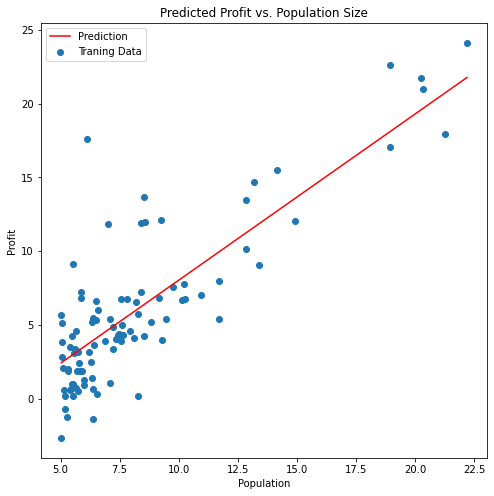

In [24]:
fig, ax = plt.subplots(figsize=(8,8))
ax.plot(l, bfl, 'r', label='Prediction')
ax.scatter(data.Population, data.Profit, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')
plt.show()

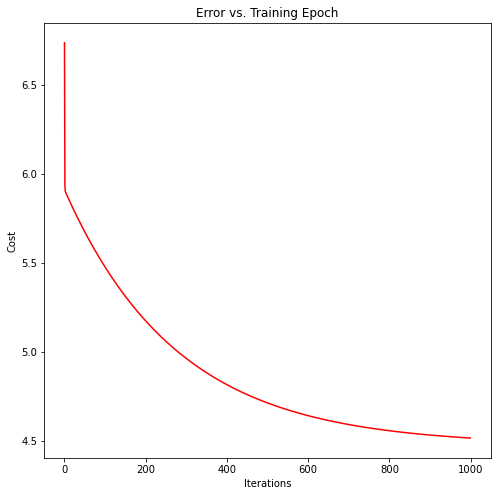

In [26]:
fig, ax = plt.subplots(figsize=(8,8))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')
plt.show()